Paige Haring

peh40@pitt.edu

Todo8

10/3/17

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
consumerKey = 'XXXXXXXXXXXXXXXXXXXXXXX'
consumerSecret = 'XXXXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key=consumerKey, 
    consumer_secret=consumerSecret)

#connect to the API
api = tweepy.API(auth)

In [3]:
#Search some tweets! Let's look at hashtag #H2P (Hail to Pitt)
result = api.search(q='%23H2P')

In [4]:
len(result)

15

In [5]:
result[0] #json format

Status(_api=<tweepy.api.API object at 0x117e4c4e0>, _json={'created_at': 'Wed Oct 04 01:06:54 +0000 2017', 'id': 915382688483303424, 'id_str': '915382688483303424', 'text': 'RT @Pitt_MSOC: THE CLOCK EXPIRES AND THE PANTHERS WIN! Pitt upsets No. 14 Columbia 1-0 on the road! #H2P https://t.co/EdjpNbCBJH', 'truncated': False, 'entities': {'hashtags': [{'text': 'H2P', 'indices': [100, 104]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Pitt_MSOC', 'name': "Pitt Men's Soccer", 'id': 366916564, 'id_str': '366916564', 'indices': [3, 13]}], 'urls': [], 'media': [{'id': 915381984955736064, 'id_str': '915381984955736064', 'indices': [105, 128], 'media_url': 'http://pbs.twimg.com/media/DLQXEL8UIAAJTgH.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DLQXEL8UIAAJTgH.jpg', 'url': 'https://t.co/EdjpNbCBJH', 'display_url': 'pic.twitter.com/EdjpNbCBJH', 'expanded_url': 'https://twitter.com/Pitt_MSOC/status/915382555481911298/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1280, 'h': 720

In [6]:
#Turn off pretty print!
%pprint

Pretty printing has been turned OFF


In [7]:
tweet1 = result[1] #get the data of the first tweet...

dir(tweet1)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']

In [8]:
tweet1.author

User(_api=<tweepy.api.API object at 0x117e4c4e0>, _json={'id': 818936111636549632, 'id_str': '818936111636549632', 'name': 'Ryan Zimba', 'screen_name': 'RyanZimba', 'location': 'Pittsburgh, PA', 'description': "BP '16 - Pitt '20", 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 34, 'friends_count': 31, 'listed_count': 0, 'created_at': 'Tue Jan 10 21:42:38 +0000 2017', 'favourites_count': 9, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 73, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/820293926577905664/zlFxeNZv_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/820293926577905664/zlFxeNZv_normal.jp

**That's a LOT of information! I see a name, a location, a timestamp, screen name, her profile's description, how many follwers she has, how many tweets she's favorited, even the url of her profile's background!!! That's actually crazy.**

In [9]:
print(tweet1.text)

RT @Pitt_MSOC: THE CLOCK EXPIRES AND THE PANTHERS WIN! Pitt upsets No. 14 Columbia 1-0 on the road! #H2P https://t.co/EdjpNbCBJH


In [10]:
tweet1.lang

'en'

In [11]:
tweet1.user == tweet1.author #Maybe if this were a retweet, this would be false?

True

In [12]:
tweet1.user.screen_name

'RyanZimba'

In [13]:
tweet1.user.description

"BP '16 - Pitt '20"

In [14]:
tweet1.created_at

datetime.datetime(2017, 10, 4, 1, 6, 51)

In [15]:
tweet1.id

915382676370190336

In [16]:
tweet1.favorite_count

0

In [17]:
#I'll download the first 100 tweets of the #H2P tag
results = []

for tweet in tweepy.Cursor(api.search, q='%23H2P').items(100):
    results.append(tweet)
    
len(results)

100

In [18]:
#This creates a function that transforms the json info we have into a DataFrame.
#It only includes some of the info for analysis like id, text, retweet count, favorite count,
# tweet source, when the tweet was created, the user ID, screen name, and name, the user description
# the user's follower count, friend count, location, and timezone

def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet 
    in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet 
    in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet 
    in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

#Do this funciton on the list of 100 tweets
df = toDataFrame(results)

In [19]:
df.head()
len(df)

100

In [20]:
df.tail()
#Wait that's so cool! Emojis show up in jupyter notebook!
#I'm noticing a lot of these tweets are retweets

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
95,915330903643222018,Catch tonight's game live on WatchESPN/WatchES...,1,4,TweetDeck,2017-10-03 21:41:08,366916564,Pitt_MSOC,Pitt Men's Soccer,2011-09-03 01:58:11,The official Twitter account of Pitt Men's Soc...,2644,584,"Pittsburgh, PA",Eastern Time (US & Canada)
96,915329351566192640,RT @CoachDuzzPittFB: Week 6 #ACC #H2P https://...,34,0,Twitter for iPhone,2017-10-03 21:34:58,633992427,noah_aftanas,Noah,2012-07-12 17:47:11,SVC 21' SC: valleybaseball1,556,557,,None
97,915329297023250433,@tgradous @cnsnews Siragusa is a Pittsburgh gu...,0,0,Twitter Web Client,2017-10-03 21:34:45,54244669,PceThruStrength,Je suis Juif Allan,2009-07-06 15:59:20,"American, Zionist, Physician, Engineer (5 US p...",1980,1489,God-Blessed America,Pacific Time (US & Canada)
98,915328451971883008,RT @Pitt_MSOC: Gameday in the Big🍎!\n\n📍: NYC\...,14,0,Twitter for iPhone,2017-10-03 21:31:23,323108085,ChuckiePeperak,Chuckie,2011-06-24 08:08:18,JB17,492,1806,,Quito
99,915327883735953411,RT @CoachDuzzPittFB: Week 6 #ACC #H2P https://...,34,0,Twitter for iPhone,2017-10-03 21:29:08,61060954,robharley34,Coach Harley,2009-07-29 00:10:41,Linebackers Coach/Recruiting Coordinator at Pi...,8788,874,"Pittsburgh, PA",Eastern Time (US & Canada)


In [21]:
#Let's get rid of None values for the timezone just like in the tutorial
df = df[df.userTimezone.notnull()]
len(df)

60

In [22]:
#That cut our number of tweets nearly in half!
df.head()

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
2,915382676089180160,RT @Pitt_MSOC: THE CLOCK EXPIRES AND THE PANTH...,12,0,Twitter Web Client,2017-10-04 01:06:51,70794772,SpeechClassHero,Stav,2009-09-01 21:43:42,My mom always used to say that average people ...,326,706,"DeKalb, IL",Central Time (US & Canada)
3,915382674008678400,RT @Pitt_MSOC: THE CLOCK EXPIRES AND THE PANTH...,12,0,Twitter for iPhone,2017-10-04 01:06:51,243482492,drewneddy,Drew Nedzinski,2011-01-27 04:08:17,Banker. Former D1 Golfer. Pitt Panthers #H2P #...,321,692,"DuBois, PA",Eastern Time (US & Canada)
6,915382616387448832,RT @Pitt_MSOC: THE CLOCK EXPIRES AND THE PANTH...,12,0,Twitter for iPhone,2017-10-04 01:06:37,187653797,mark_strine,Mark,2010-09-06 20:27:58,Pitt '18 Intern with S&H Express,402,677,,Eastern Time (US & Canada)
7,915382606547562497,RT @Pitt_MSOC: THE CLOCK EXPIRES AND THE PANTH...,12,0,TweetDeck,2017-10-04 01:06:35,192907472,cpugliesi,Pugs,2010-09-20 13:48:50,,374,794,PA,Atlantic Time (Canada)
9,915382555481911298,THE CLOCK EXPIRES AND THE PANTHERS WIN! Pitt u...,12,6,Twitter Web Client,2017-10-04 01:06:22,366916564,Pitt_MSOC,Pitt Men's Soccer,2011-09-03 01:58:11,The official Twitter account of Pitt Men's Soc...,2644,584,"Pittsburgh, PA",Eastern Time (US & Canada)


In [23]:
#Let's get the average number of retweets and favorties per location

df_pop = df.groupby('userLocation')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
df_pop

#looks like even though we got rid of None values in userLocation, there are still empty Strings

,tweetRetweetCt,tweetFavoriteCt
userLocation,,
,10.545455,0.272727
"A-Wall, PA",5.000000,0.000000
"Aliquippa, PA",5.000000,0.000000
Allentown PA,2.000000,0.000000
"Bettendorf, IA",2.000000,0.000000
"DeKalb, IL",12.000000,0.000000
"DuBois, PA",12.000000,0.000000
God-Blessed America,0.000000,0.000000
Heinz Field,1.000000,10.000000


In [24]:
#Manchester has so many retweets! Let's see what that tweet is that makes it so good
df.loc[df.userLocation == 'Manchester, PA', 'tweetText']
#Looks like it's a video

25    RT @Pitt_FB: 🎥 Field Pass: Pitt vs. YSU 🎥\nAlw...
Name: tweetText, dtype: object

In [25]:
#Let's get the tweets from Youngstown, Ohio
df.loc[df.userLocation == 'Youngstown, Ohio', :]

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone


In [26]:
#How about average number of retweets and favorites per timezone?
df_time = df.groupby('userTimezone')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
df_time

,tweetRetweetCt,tweetFavoriteCt
userTimezone,,
Atlantic Time (Canada),19.666667,0.000000
Central Time (US & Canada),5.666667,2.666667
Eastern Time (US & Canada),9.939394,3.757576
Hawaii,121.000000,0.000000
Mountain Time (US & Canada),44.000000,0.000000
Pacific Time (US & Canada),1.777778,0.777778
Quito,15.000000,1.428571


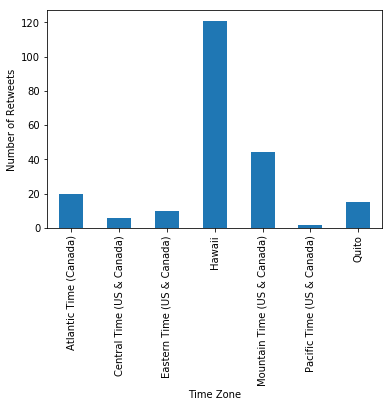

In [27]:
df_time['tweetRetweetCt'].plot(kind = 'bar')
plt.xlabel('Time Zone')
plt.ylabel('Number of Retweets')
plt.show()

### Analysis
Looks like the most retweets of #H2P come from areas with Mountain Time, followed by Hawaii. I'm surprised that Eastern Time has the third least number of retweets considering Pittsburgh is the Eastern Time zone... Let's see what the tweets from the Mountain Time zone look like.

In [28]:
df.loc[df.userTimezone == 'Mountain Time (US & Canada)', :]

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
57,915354165857128448,"RT @Pitt_FB: 🎥 Field Pass 🎥\nPitt 42, Rice 10\...",44,0,Twitter for iPhone,2017-10-03 23:13:34,19409608,CoachPartridge,Charlie Partridge,2009-01-23 19:45:01,Official Twitter Account - Football Coach - Pi...,18456,1897,"Pittsburgh, PA",Mountain Time (US & Canada)


In [29]:
df.loc[df.userTimezone == 'Mountain Time (US & Canada)', 'tweetText']
#It's another video.

57    RT @Pitt_FB: 🎥 Field Pass 🎥\nPitt 42, Rice 10\...
Name: tweetText, dtype: object

Maybe the reason Eastern Time Zone doesn't have the largest average amount of retweets for tweets with the hastag #H2P is because we got rid of all of the tweets whose time zone was set to None. Those could have actually been from here (or somewhere else) and the time zone just wasn't recorded with the tweet's data.